##  Short Assignment 4

### Albeena Sofi

The assignment is to evaluate the Titanic passenger dataset which looks at the attributes of a list of passengers on the Titanic, the survival rates and other parameters such as age, gender, siblings/spouses/parents/children aboard, fare, port of embarkation.
After analysing the dataset, the next step is to predict the passenger survival.
The factors taken into account are passenger's gender, social class (determined by the passenger class) and age group and the family members travelling with.

###### Import the libraries and dataset

In [1]:
# data analysis libraries
import pandas as pd
import numpy as np #linear algebra for multidimensional array computing

# data visualization libraries
import matplotlib
from matplotlib import pyplot as p
#plotting library within matplot
%matplotlib inline
# To enable inline plotting

# To pull in the data file, use the pandas function read_csv, header parameter set to index 0.
df = pd.read_csv('train.csv', header=0) 

###### Analyzing the data

In [2]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
df.describe(include="all") 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Ford, Mrs. Edward (Margaret Ann Watson)",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


About 20% of the entries are missing from the Age column.
Column 11 (Cabin) is missing more than 70% of the information.
Two values from the Embarked column are missing.

To fill in the missing data in the Age column, we use the mean age based on Sex and Pclass

In [5]:
mean_Age = df.groupby(['Sex', 'Pclass'])['Age'].mean()

def fillin_Age(row):
    if pd.isnull(row['Age']):
        return mean_Age[row['Sex'],row['Pclass']]
    else:
        return row['Age']

    
df['Age'] = df.apply(fillin_Age, axis=1)

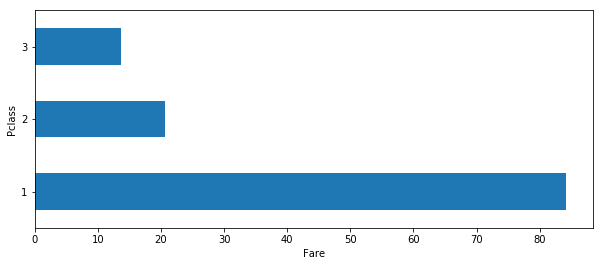

In [6]:
# The ticket fare corresponds to the class the passengers were travelling in.
ax= p.subplot()
ax.set_xlabel('Fare')
df.groupby('Pclass').mean()['Fare'].plot(kind='barh', figsize=(10,4), ax=ax)

In [7]:
#Create a new column for familysize, to analyse if the passenger was travelling with any family member.
df['familySize'] = df['SibSp'] + df['Parch']

###### Change value description for ease of interpretation

In [8]:
def value_description(df):
    Survived_value = {0: False, 1: True}
    df['Survived'] = df['Survived'].map(Survived_value)
    
    Pclass_value = {1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'}
    df['Pclass'] = df['Pclass'].map(Pclass_value)
    
    return df

df = value_description(df)

In [9]:
df['AgeRange'] = pd.cut(df['Age'], [0, 16, 65, 80], labels=['child', 'adult', 'elderly'])

###### Remove unwanted information

We drop certain values from the dataset:
PassengerId (this is just a number assigned to each passenger)

Name (not considered for this study)

SibSp, Parch (as we have the familySize column now)

Ticket (ticket numbers, not useful)

Cabin (lot of missing values, not taken into consideration)

Embarked (not taken into consideration)

In [10]:
df = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [11]:
df

,Survived,Pclass,Sex,Age,Fare,familySize,AgeRange
0,False,Lower Class,male,22.000000,7.2500,1,adult
1,True,Upper Class,female,38.000000,71.2833,1,adult
2,True,Lower Class,female,26.000000,7.9250,0,adult
3,True,Upper Class,female,35.000000,53.1000,1,adult
4,False,Lower Class,male,35.000000,8.0500,0,adult
5,False,Lower Class,male,26.507589,8.4583,0,adult
6,False,Upper Class,male,54.000000,51.8625,0,adult
7,False,Lower Class,male,2.000000,21.0750,4,child
8,True,Lower Class,female,27.000000,11.1333,2,adult
9,True,Middle Class,female,14.000000,30.0708,1,child


###### Visualizing survival based on gender, age, social status and family size

In [12]:
#Survival based on gender
survived_sex = df.groupby('Sex')['Survived'].mean()
pd.crosstab(df.Sex, df.Survived)

Survived,False,True
Sex,,
female,81,233
male,468,109


In [13]:
#Survival based on age
survived_age = df.groupby('AgeRange')['Survived'].mean()
pd.crosstab(df.AgeRange, df.Survived)

Survived,False,True
AgeRange,,
child,45,55
adult,497,286
elderly,7,1


In [14]:
#Survival based on class
survived_class = df.groupby('Pclass')['Survived'].mean()
pd.crosstab(df.Pclass, df.Survived)

Survived,False,True
Pclass,,
Lower Class,372,119
Middle Class,97,87
Upper Class,80,136


(0.0, 1.0)

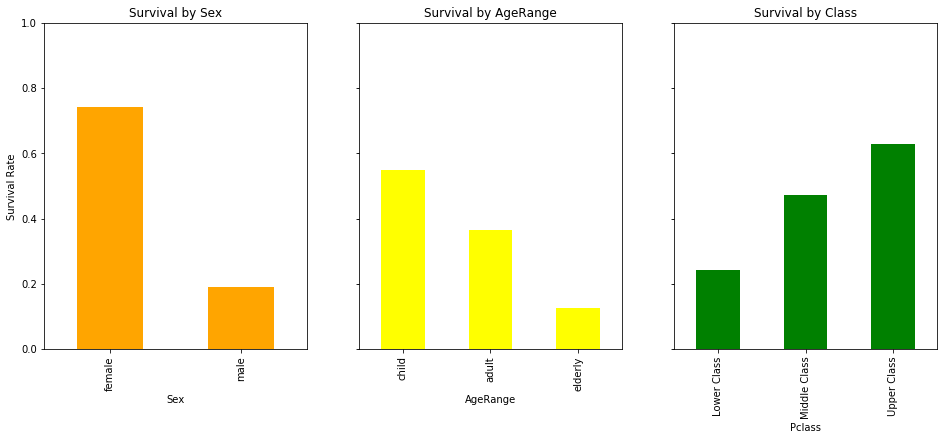

In [15]:
fig, (axis1,axis2,axis3) = p.subplots(1, 3, figsize=(16,6))
ax = survived_sex.plot.bar(ax=axis1, color='orange', title='Survival by Sex', sharey=True)
ax.set_ylabel('Survival Rate')
ax.set_ylim(0.0,1.0)
ax = survived_age.plot.bar(ax=axis2, color='yellow', title='Survival by AgeRange', sharey=True)
ax.set_ylim(0.0,1.0)
ax = survived_class.plot.bar(ax=axis3, color='green', title='Survival by Class', sharey=True)
ax.set_ylim(0.0,1.0)


In [16]:
#Survival based on family size
survived_family = df.groupby('familySize')['Survived'].mean()
pd.crosstab(df.familySize, df.Survived)

Survived,False,True
familySize,,
0,374,163
1,72,89
2,43,59
3,8,21
4,12,3
5,19,3
6,8,4
7,6,0
10,7,0


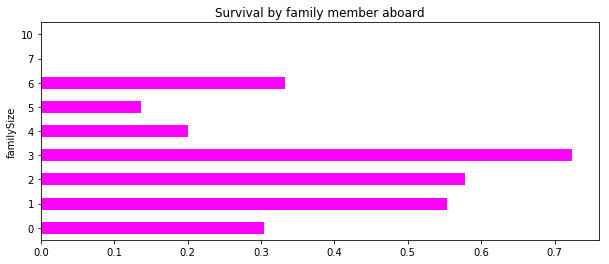

In [17]:
ax = survived_family.plot.barh(figsize=(10,4), color='magenta', title='Survival by family member aboard')

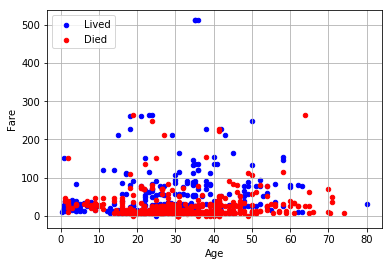

In [18]:
#Combining age, fare (determining the class) and survival together
figure, i = p.subplots()
i.scatter(df[df['Survived']==True]['Age'],df[df['Survived']==True]['Fare'], c='blue', s=20)
i.scatter(df[df['Survived']==False]['Age'],df[df['Survived']==False]['Fare'], c='red', s=20)
i.set_xlabel('Age')
i.set_ylabel('Fare')
i.legend(('Lived', 'Died'), scatterpoints=1, loc='upper left', fontsize=10)
i.grid(True)
p.show()

###### Conclusion

Gender is a good indicator of survival. Of all the survivals, 68% were females and about 32% males

Of the different age groups, children (<16 years) had a better chance of survival as compared to adults. Another thing to note is that out of the 8 elderly people only 1 survived. This implied that children were given first preference in the rescue operation.

The chaces of survival seem to be more as the fare increases, that is the upper class people are more likely to survive.

The study also reveals that passengers having another family member aboard had better chances of survival.

Another interesting detail in the given dataset is the titles in the name column like Mr, Sir, Master, Miss, Mrs, Lady, etc. which haven't been considered in ths study, but could reveal important information about the social class of the passengers or even their ages.